In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster


## Carga y union de datos 

Cargo los 3 archivos usados para el analisis y que pasaron por el ETL

In [73]:
homicidios_hechos=pd.read_csv('Data\Limpia\homicidios_hechos.csv')
homicidios_victimas=pd.read_csv('Data\Limpia\homicidios_victimas.csv')
comunas=pd.read_csv('Data\Limpia\comunas.csv')

In [74]:
homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,SEMESTRE,ANIO_SEMESTRE,MM,DD,ASPO,HORA,...,CALLE,CRUCE,DIRECCION_NORMALIZADA,COMUNA,XY (CABA),LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,2016_1,1,1,ANTES,04:00:00,...,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2016_1,1,2,ANTES,01:15:00,...,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,2016_1,1,3,ANTES,07:00:00,...,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,2016_1,1,10,ANTES,00:00:00,...,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,2016_1,1,21,ANTES,05:20:00,...,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,2021_2,12,13,DESPUES,17:10:00,...,RIESTRA AV.,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,2021_2,12,20,DESPUES,01:10:00,...,"DELLEPIANE, LUIS, TTE. GRAL.",LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,2021_2,12,30,DESPUES,00:43:00,...,GAONA AV.,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,2021_2,12,15,DESPUES,10:30:00,...,"PERON, EVA AV.",NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS


In [75]:
homicidios_hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'SEMESTRE', 'ANIO_SEMESTRE', 'MM',
       'DD', 'ASPO', 'HORA', 'HH', 'DIA', 'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE',
       'CALLE', 'CRUCE', 'DIRECCION_NORMALIZADA', 'COMUNA', 'XY (CABA)',
       'LONGITUD', 'LATITUD', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

Borro del df homicidios_hechos las columnas que no considero necesarias explorar

In [76]:
homicidios_hechos.drop(['ANIO_SEMESTRE', 'HORA', 'LUGAR_DEL_HECHO', 'CALLE',
       'CRUCE', 'DIRECCION_NORMALIZADA','XY (CABA)'], axis=1, inplace=True)

In [77]:
homicidios_victimas

,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,RANGO_ETARIO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01,JOVENES
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70.0,2016-01-02,A_MAYORES
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-03,ADULTOS
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18.0,2016-01-10,JOVENES
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29.0,2016-02-01,JOVENES
...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50.0,2021-12-12,ADULTOS
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18.0,2021-12-18,JOVENES
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43.0,2021-12-20,ADULTOS
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27.0,2022-01-02,JOVENES


In [78]:
homicidios_victimas.columns

Index(['ID', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO', 'RANGO_ETARIO'],
      dtype='object')

Borro del df homicidios_victimas las columnas que no considero necesarias explorar

In [79]:
homicidios_victimas.drop(['FECHA', 'AAAA', 'MM', 'DD', 'VICTIMA'], axis=1, inplace=True)


In [80]:
homicidios_victimas

,ID,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,RANGO_ETARIO
0,2016-0001,CONDUCTOR,MASCULINO,19.0,2016-01-01,JOVENES
1,2016-0002,CONDUCTOR,MASCULINO,70.0,2016-01-02,A_MAYORES
2,2016-0003,CONDUCTOR,MASCULINO,30.0,2016-01-03,ADULTOS
3,2016-0004,CONDUCTOR,MASCULINO,18.0,2016-01-10,JOVENES
4,2016-0005,CONDUCTOR,MASCULINO,29.0,2016-02-01,JOVENES
...,...,...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50.0,2021-12-12,ADULTOS
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18.0,2021-12-18,JOVENES
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43.0,2021-12-20,ADULTOS
715,2021-0095,CONDUCTOR,MASCULINO,27.0,2022-01-02,JOVENES


Fusiono los DataFrames homicidios_hechos y homicidios_victimas, utilizando la columna 'ID' como clave de fusión y el método de fusión 'inner' (es decir solo voy a incluir en la fusión las filas donde existen ID en común en ambos)

In [81]:
df = pd.merge(homicidios_hechos, homicidios_victimas, on='ID', how='inner')

In [82]:
df

,ID,N_VICTIMAS,FECHA,AAAA,SEMESTRE,MM,DD,ASPO,HH,DIA,...,LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,RANGO_ETARIO
0,2016-0001,1,2016-01-01,2016,1,1,1,ANTES,4.0,VIERNES,...,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19.0,2016-01-01,JOVENES
1,2016-0002,1,2016-01-02,2016,1,1,2,ANTES,1.0,SABADO,...,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70.0,2016-01-02,A_MAYORES
2,2016-0003,1,2016-01-03,2016,1,1,3,ANTES,7.0,DOMINGO,...,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30.0,2016-01-03,ADULTOS
3,2016-0004,1,2016-01-10,2016,1,1,10,ANTES,0.0,DOMINGO,...,-58.465039,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18.0,2016-01-10,JOVENES
4,2016-0005,1,2016-01-21,2016,1,1,21,ANTES,5.0,JUEVES,...,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29.0,2016-02-01,JOVENES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,12,13,DESPUES,17.0,LUNES,...,-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18.0,2021-12-18,JOVENES
713,2021-0094,1,2021-12-20,2021,12,12,20,DESPUES,1.0,LUNES,...,-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43.0,2021-12-20,ADULTOS
714,2021-0095,1,2021-12-30,2021,12,12,30,DESPUES,0.0,JUEVES,...,-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27.0,2022-01-02,JOVENES
715,2021-0096,1,2021-12-15,2021,12,12,15,DESPUES,10.0,MIERCOLES,...,-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60.0,2021-12-20,ADULTOS


In [83]:
df.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'SEMESTRE', 'MM', 'DD', 'ASPO',
       'HH', 'DIA', 'TIPO_DE_CALLE', 'COMUNA', 'LONGITUD', 'LATITUD',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'ROL', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO', 'RANGO_ETARIO'],
      dtype='object')

In [84]:
comunas

,COMUNA,BARRIOS,AREA
0,2,RECOLETA,6.317265e+06
1,5,ALMAGRO - BOEDO,6.660603e+06
2,6,CABALLITO,6.851029e+06
3,7,FLORES - PARQUE CHACABUCO,1.242290e+07
4,9,LINIERS - MATADEROS - PARQUE AVELLANEDA,1.650531e+07
5,10,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,1.265656e+07
6,11,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,1.412004e+07
7,12,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,1.557093e+07
8,14,PALERMO,1.584587e+07
9,3,BALVANERA - SAN CRISTOBAL,6.385991e+06


Vuelvo a unir el DataFrame anterior con el de comunas utilizando la columna 'COMUNA' como clave de fusión y el método de fusión 'left' (significa que se conservarán todas las filas del DataFrame de la izquierda (df), y se agregarán las columnas del DataFrame de la derecha (comunas) donde haya coincidencias en la columna 'COMUNA')

In [85]:
df = pd.merge(df, comunas, on='COMUNA', how='left')

In [86]:
df

,ID,N_VICTIMAS,FECHA,AAAA,SEMESTRE,MM,DD,ASPO,HH,DIA,...,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,RANGO_ETARIO,BARRIOS,AREA
0,2016-0001,1,2016-01-01,2016,1,1,1,ANTES,4.0,VIERNES,...,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19.0,2016-01-01,JOVENES,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,2.221690e+07
1,2016-0002,1,2016-01-02,2016,1,1,2,ANTES,1.0,SABADO,...,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70.0,2016-01-02,A_MAYORES,LINIERS - MATADEROS - PARQUE AVELLANEDA,1.650531e+07
2,2016-0003,1,2016-01-03,2016,1,1,3,ANTES,7.0,DOMINGO,...,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30.0,2016-01-03,ADULTOS,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,1.779457e+07
3,2016-0004,1,2016-01-10,2016,1,1,10,ANTES,0.0,DOMINGO,...,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18.0,2016-01-10,JOVENES,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,2.221690e+07
4,2016-0005,1,2016-01-21,2016,1,1,21,ANTES,5.0,JUEVES,...,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29.0,2016-02-01,JOVENES,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,1.779457e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,12,13,DESPUES,17.0,LUNES,...,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18.0,2021-12-18,JOVENES,FLORES - PARQUE CHACABUCO,1.242290e+07
713,2021-0094,1,2021-12-20,2021,12,12,20,DESPUES,1.0,LUNES,...,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43.0,2021-12-20,ADULTOS,LINIERS - MATADEROS - PARQUE AVELLANEDA,1.650531e+07
714,2021-0095,1,2021-12-30,2021,12,12,30,DESPUES,0.0,JUEVES,...,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27.0,2022-01-02,JOVENES,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,1.412004e+07
715,2021-0096,1,2021-12-15,2021,12,12,15,DESPUES,10.0,MIERCOLES,...,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60.0,2021-12-20,ADULTOS,LINIERS - MATADEROS - PARQUE AVELLANEDA,1.650531e+07


In [87]:
df.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'SEMESTRE', 'MM', 'DD', 'ASPO',
       'HH', 'DIA', 'TIPO_DE_CALLE', 'COMUNA', 'LONGITUD', 'LATITUD',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'ROL', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO', 'RANGO_ETARIO', 'BARRIOS', 'AREA'],
      dtype='object')

## Exploracion y Analisis de los Datos

Columnas, tipos de datos, cantidad de registros y valores nulos

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   717 non-null    object 
 1   N_VICTIMAS           717 non-null    int64  
 2   FECHA                717 non-null    object 
 3   AAAA                 717 non-null    int64  
 4   SEMESTRE             717 non-null    int64  
 5   MM                   717 non-null    int64  
 6   DD                   717 non-null    int64  
 7   ASPO                 717 non-null    object 
 8   HH                   716 non-null    float64
 9   DIA                  717 non-null    object 
 10  TIPO_DE_CALLE        717 non-null    object 
 11  COMUNA               717 non-null    int64  
 12  LONGITUD             704 non-null    float64
 13  LATITUD              704 non-null    float64
 14  PARTICIPANTES        717 non-null    object 
 15  VICTIMA              717 non-null    obj

Estadísticas descriptivas para variables numéricas

In [89]:
df.describe()

,N_VICTIMAS,AAAA,SEMESTRE,MM,DD,HH,COMUNA,LONGITUD,LATITUD,EDAD,AREA
count,717.000000,717.000000,717.000000,717.000000,717.000000,716.000000,717.000000,704.000000,704.000000,664.000000,7.150000e+02
mean,1.061367,2018.174338,5.864714,6.688982,15.953975,11.554469,7.430962,-58.441664,-34.619700,42.167169,1.522497e+07
std,0.257024,1.672655,3.362186,3.575140,8.674876,6.700055,4.385067,0.046397,0.035292,19.788034,4.855595e+06
min,1.000000,2016.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-58.529942,-34.705250,1.000000,6.317265e+06
25%,1.000000,2017.000000,3.000000,4.000000,9.000000,6.000000,4.000000,-58.476556,-34.643918,27.000000,1.265656e+07
50%,1.000000,2018.000000,6.000000,7.000000,16.000000,11.000000,8.000000,-58.444513,-34.622866,37.000000,1.557093e+07
75%,1.000000,2019.000000,8.000000,10.000000,23.000000,17.000000,11.000000,-58.401841,-34.597013,56.250000,1.779457e+07
max,3.000000,2021.000000,12.000000,12.000000,31.000000,23.000000,15.000000,-58.356082,-34.534654,95.000000,2.221690e+07


Conclusión: No se observan valores outliers, y todos tienen los parámetros esperados.

-----------


Corroboro que no existan filas duplicadas


In [90]:
df[df.duplicated()]

,ID,N_VICTIMAS,FECHA,AAAA,SEMESTRE,MM,DD,ASPO,HH,DIA,...,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,RANGO_ETARIO,BARRIOS,AREA


Conclusión:  No existen filas duplicadas

---------

Creo un count plot para visualizar la distribucion de las victimas por cada hecho

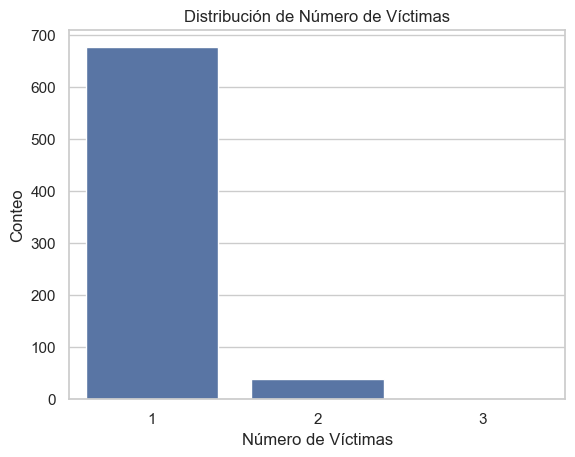

In [91]:
sns.countplot(x=df['N_VICTIMAS'])
plt.title('Distribución de Número de Víctimas')
plt.xlabel('Número de Víctimas')
plt.ylabel('Conteo')
plt.show()

Muestro la distribucion en un formato de tabla para ver los valores y sus frequencias

In [92]:
conteo_victimas = df['N_VICTIMAS'].value_counts()
df_conteo_victimas = pd.DataFrame(conteo_victimas).reset_index()
df_conteo_victimas.columns = ['Numero_Victimas', 'Conteo']
total_victimas = df_conteo_victimas['Conteo'].sum()
df_conteo_victimas['Porcentaje'] = (df_conteo_victimas['Conteo'] / total_victimas) * 100
df_conteo_victimas

,Numero_Victimas,Conteo,Porcentaje
0,1,676,94.281729
1,2,38,5.299861
2,3,3,0.418410


Conclusión: en la mayoria de los siniestros mortales hay una victima (94%), son pocos los casos donde hay 2 victimas mortales (5%) y es una excepcion que existan 3 muertes en un mismo hecho (0.42%). No existen en esta base de datos siniestros que tengan mas de 3 victimas mortales.

-------

Muestro en un boxplot la distribucion de las Edades

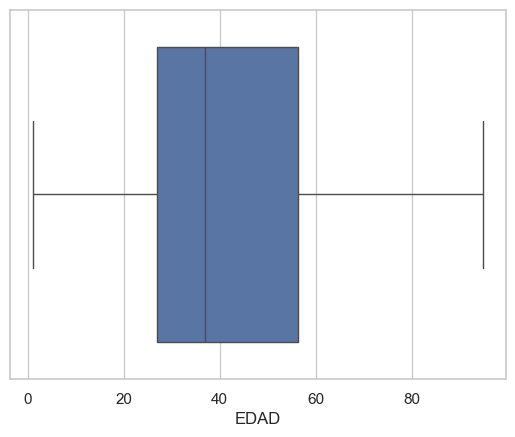

In [93]:
sns.boxplot(x=df['EDAD'])
plt.show()



Conclusión: como se ve en el boxplot y apoyándome en el describe visto anteriormente se nota que la mediana de la edad es 37, y los cuartiles 1 y 3 son 27 y 56 respectivamente, que serían los límites de la caja del gráfico.

--------

Establezco un estilo de fondos para los proximos graficos que voy a crear usando Seaborn

In [94]:
sns.set(style="whitegrid")

Creó un count plot que muestra la distribución del número de víctimas por año

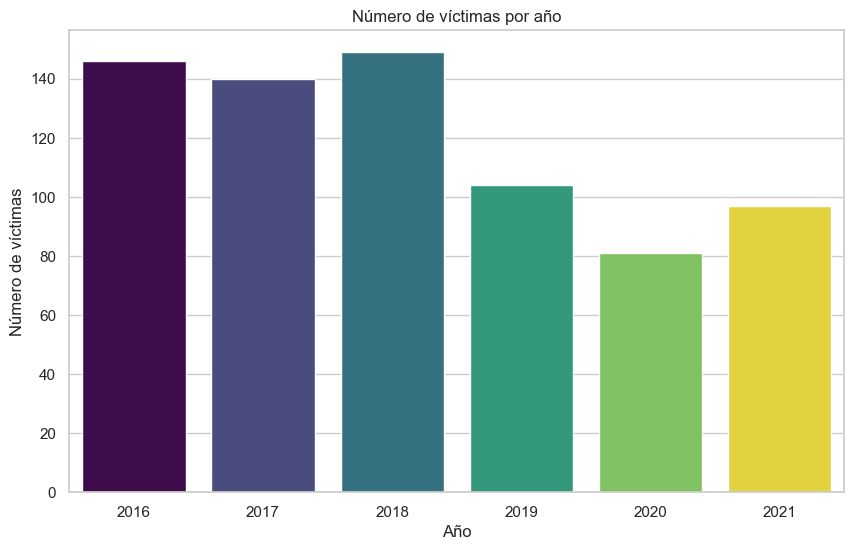

In [95]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AAAA', data=df, hue='AAAA', palette='viridis', legend=False)
plt.title('Número de víctimas por año')
plt.xlabel('Año')
plt.ylabel('Número de víctimas')
plt.show()

Conclusión: de los datos analizados, se puede ver una disminución de los siniestros en los últimos años, que se acentúa en el 2020, donde se registraron menos hechos.<br>
Hay que tener en cuenta que los datos corresponden a Ciudad Autónoma de Buenos Aires y en el año 2020 se vivió una situación muy particular como consecuencia de la pandemia de COVID. En Argentina, a través de un decreto de necesidad y urgencia se limitó la circulación de las personas.<br>
El Aislamiento Social Preventivo Y Obligatorio (desde ahora ASPO) comenzó a regir a partir del 20 de Marzo del 2020 y claramente afectó en la disminución de los siniestros.<br>
(https://www.boletinoficial.gob.ar/detalleAviso/primera/227042/20200320)


Para apreciar con mayor claridad cómo afectó el ASPO gráfico en columnas los hechos por trimestres

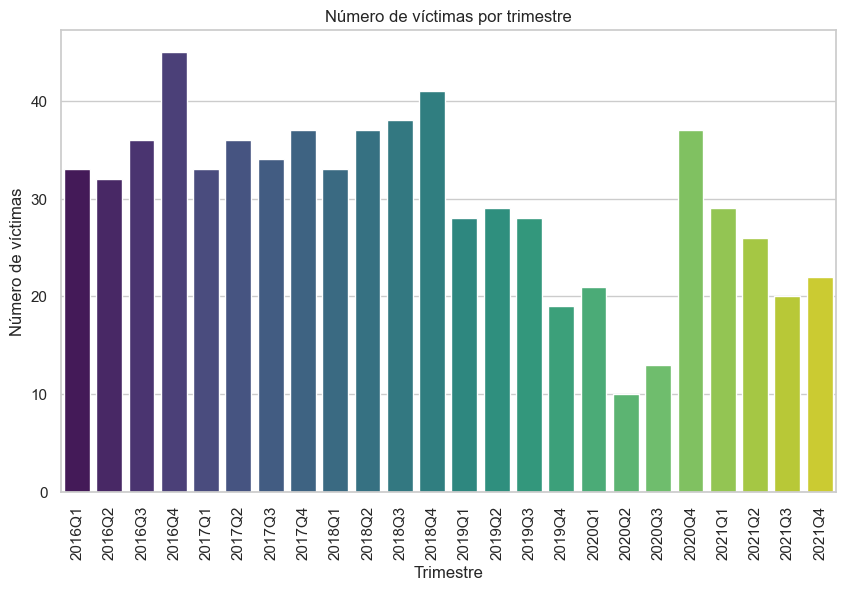

In [96]:
df["Fecha"] = df["AAAA"].astype(str) + '-' + df["MM"].astype(str) + '-01' 
df["Fecha"] = pd.to_datetime(df["Fecha"], errors='coerce')

# Creo la columna 'Trimestre'
df["Trimestre"] = df["Fecha"].dt.to_period('Q')

plt.figure(figsize=(10, 6))
sns.countplot(x='Trimestre', data=df, palette='viridis', hue='Trimestre', dodge=False, legend=False)
plt.title('Número de víctimas por trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Número de víctimas')
plt.xticks(rotation=90)
plt.show()

Conclusión: se puede apreciar con mucha claridad que el ASPO contribuye a una marcada disminución de los siniestros en el segundo y tercer trimestre del 2020

-----------

Gráfico de barras para contar la cantidad de víctimas por mes

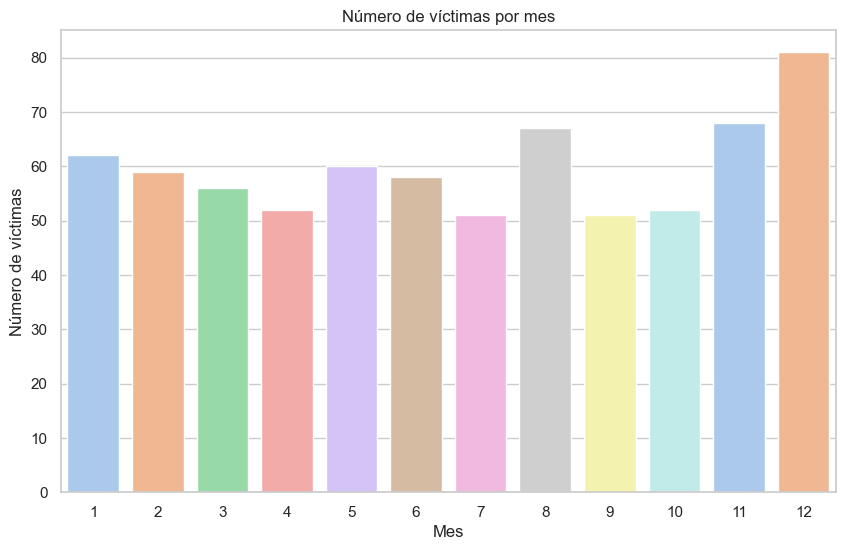

In [97]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MM', data=df, palette='pastel', hue='MM', legend=False)
plt.title('Número de víctimas por mes')
plt.xlabel('Mes')
plt.ylabel('Número de víctimas')
plt.show()


Conclusión: si bien no es muy marcada, se nota un leve aumento de los siniestros en el mes de Diciembre, el resto del año muestra valores relativamente uniformes.

-----------------------

Gráfico de barras para contar la cantidad de víctimas por día de la semana

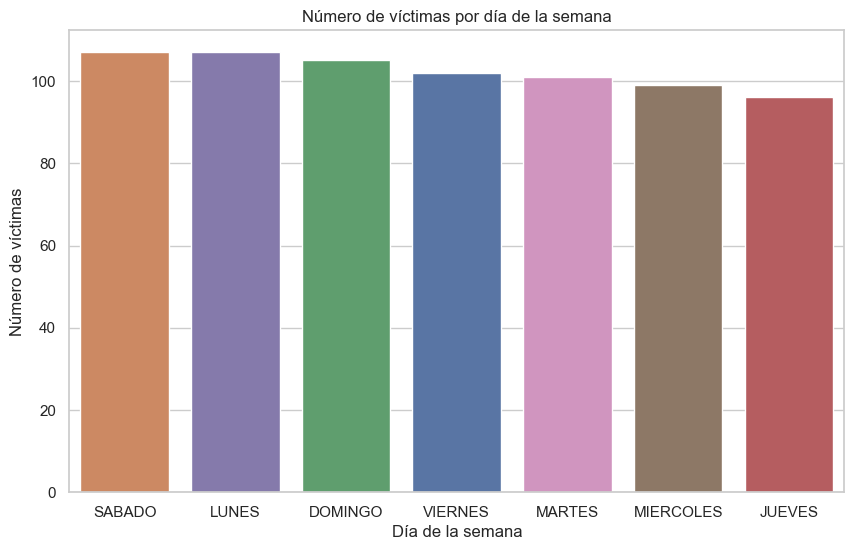

In [98]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DIA', data=df, order=df['DIA'].value_counts().index, palette='deep', hue='DIA', legend=False)
plt.title('Número de víctimas por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de víctimas')
plt.show()

Conclusión: aparentemente, y analizando el día en su conjunto sin distinguir horarios especiales, los siniestros se distribuyen uniformes en los días de la semana.

--------------

Gráfico de barras para contar la cantidad de víctimas por cada hora del dia

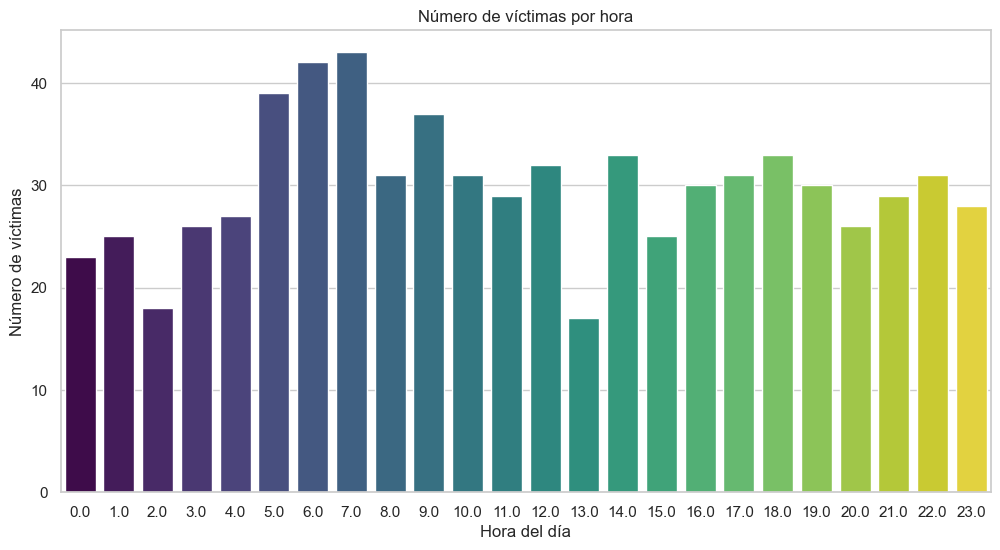

In [99]:
plt.figure(figsize=(12, 6))
sns.countplot(x='HH', data=df, palette='viridis', hue='HH', legend=False)
plt.title('Número de víctimas por hora')
plt.xlabel('Hora del día')
plt.ylabel('Número de víctimas')
plt.show()

Conclusión: se nota una disminución en las primeras horas del día, y parece que los siniestros tienen más frecuencia en las primeras horas de la mañana.

-------------

Gráfico de barras para contar la cantidad de víctimas por hora, dividiendo el dia en 6 segmentos de 4 horas cada uno

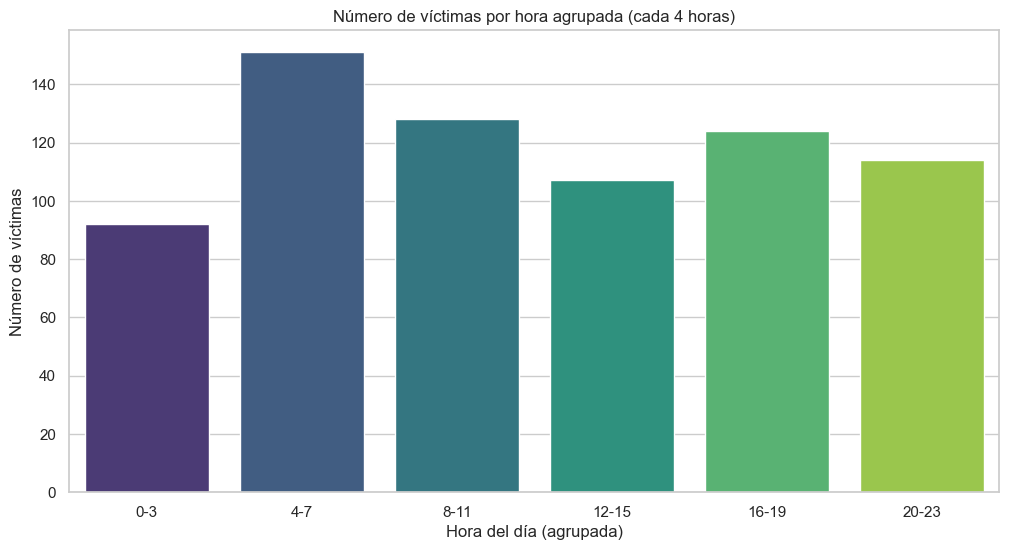

In [100]:
# Creo columnas de 4 horas cada una
df['Hora Agrupada'] = pd.cut(df['HH'], bins=range(0, 25, 4), right=False, labels=['0-3', '4-7', '8-11', '12-15', '16-19', '20-23'])
plt.figure(figsize=(12, 6))
sns.countplot(x='Hora Agrupada', data=df, palette='viridis', hue='Hora Agrupada', legend=False)
plt.title('Número de víctimas por hora agrupada (cada 4 horas)')
plt.xlabel('Hora del día (agrupada)')
plt.ylabel('Número de víctimas')
plt.show()


Conclusión: visualmente es notorio los pocos siniestros que ocurren entre las 0 y las 4, luego en las proximas 4 horas es el momento del dia donde tienen mayor ocurrencia (entre las 4 y las 8)

-------------

Boxplot para visualizar la distribución de edades por sexo

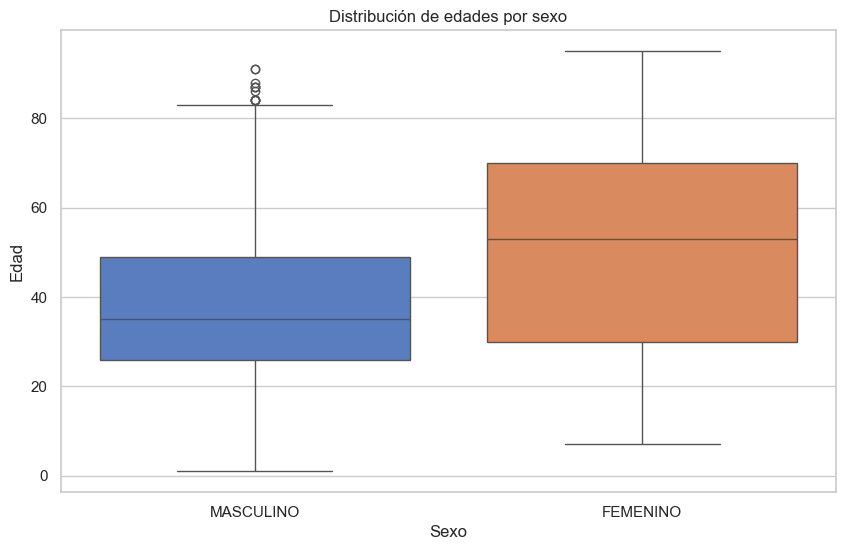

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SEXO', y='EDAD', data=df[df['SEXO']!="SD"], palette='muted', hue='SEXO', legend=False)
plt.title('Distribución de edades por sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.show()

Conclusión: si la víctima es hombre en su mayoria son jovenes, no existe tanta dispersión, la mediana ronda los 33 años, en cambio si son mujeres, por lo general son más adultas, la mediana ronda los 55 años y tiene mayor dispersión que los hombres

------------------

Gráfico de barras para contar la cantidad de accidentes según el tipo de calle

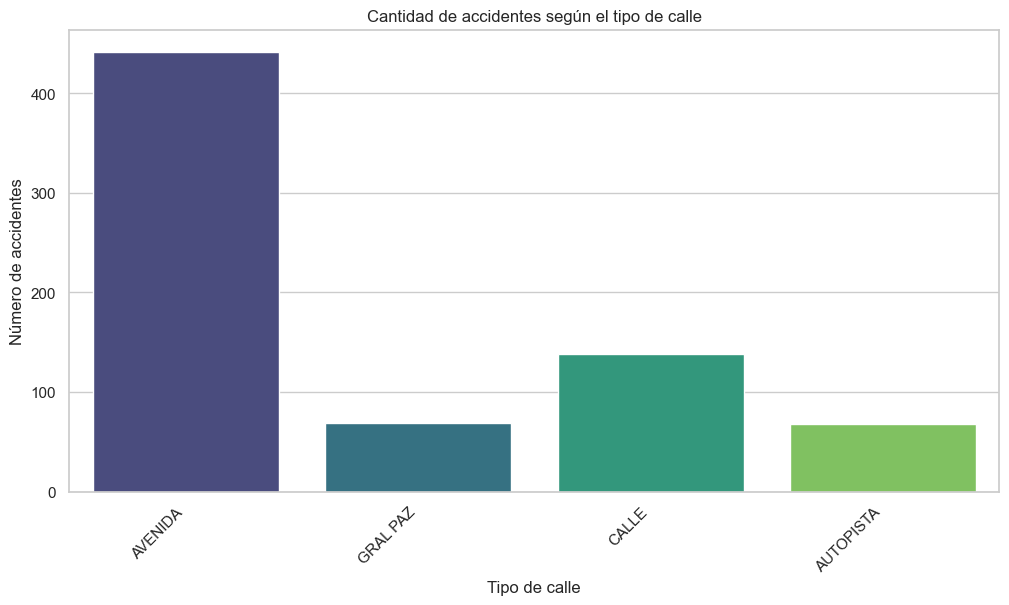

In [102]:
plt.figure(figsize=(12, 6))
sns.countplot(x='TIPO_DE_CALLE', data=df, palette='viridis', hue='TIPO_DE_CALLE', legend=False)
plt.title('Cantidad de accidentes según el tipo de calle')
plt.xlabel('Tipo de calle')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45, ha='right') 
plt.show()

Conclusión: la mayoría de los siniestros ocurren en Avenidas.

---------------------

Gráfico de barras horizontales para contar la cantidad de accidentes agrupados por Barrios

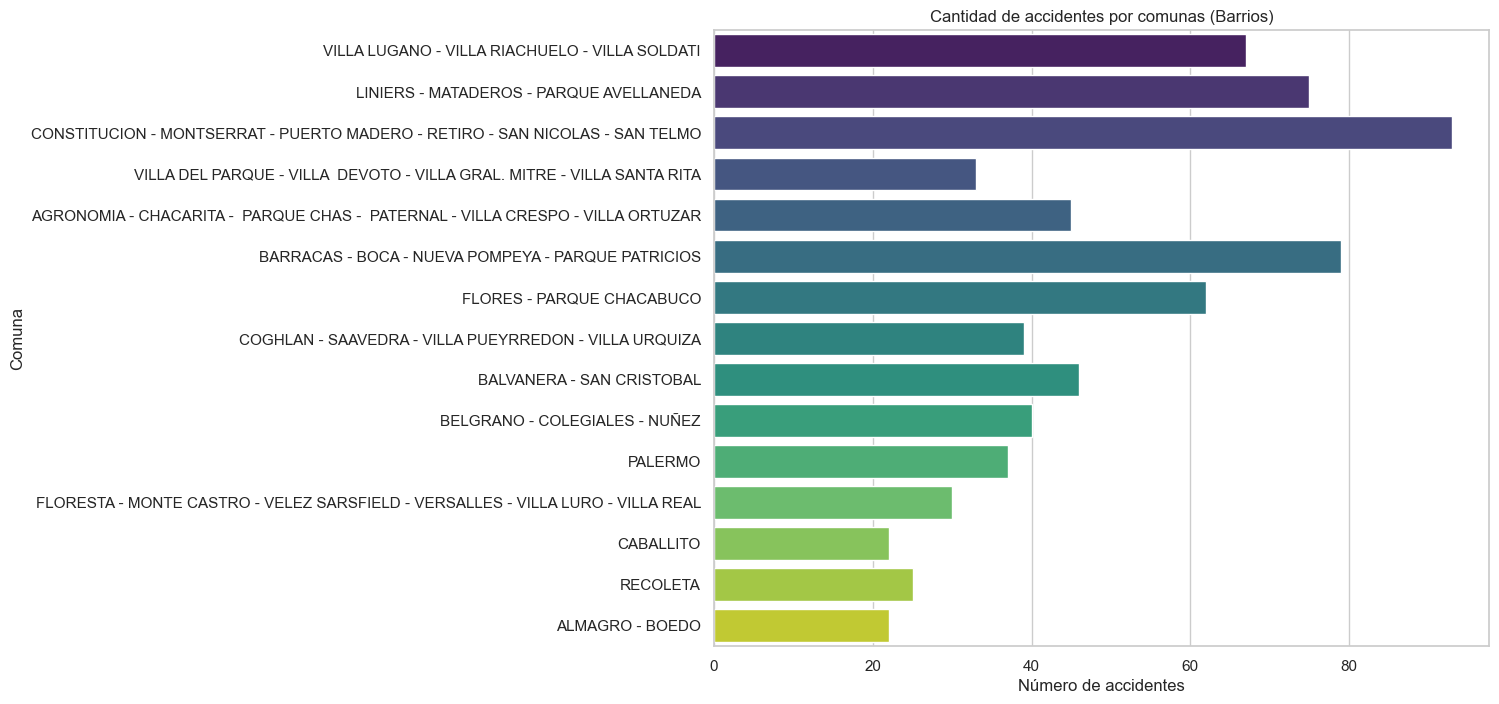

In [103]:
plt.figure(figsize=(10, 8))
sns.countplot(y='BARRIOS', data=df, palette='viridis',hue='BARRIOS', legend=False)
plt.title('Cantidad de accidentes por comunas (Barrios)')
plt.xlabel('Número de accidentes')
plt.ylabel('Comuna')
plt.show()

Conclusión: hay ciertos Barrios donde son más comunes los siniestros, zona Constitución, Barracas, Liniers y Villa Lugano por ejemplo.
Por otro lado, los barrios de Caballito, Almagro y Recoleta son menos propensos a este tipo de siniestros.

--------------

# Analisis por Sexo

Paleta de colores que voy a usar en los siguientes graficos

In [104]:
custom_palette = {'MASCULINO': 'lightblue', 'FEMENINO': 'lightcoral'}

Gráfico de barras para contar la cantidad de accidentes según el ROL , diferenciado por SEXO

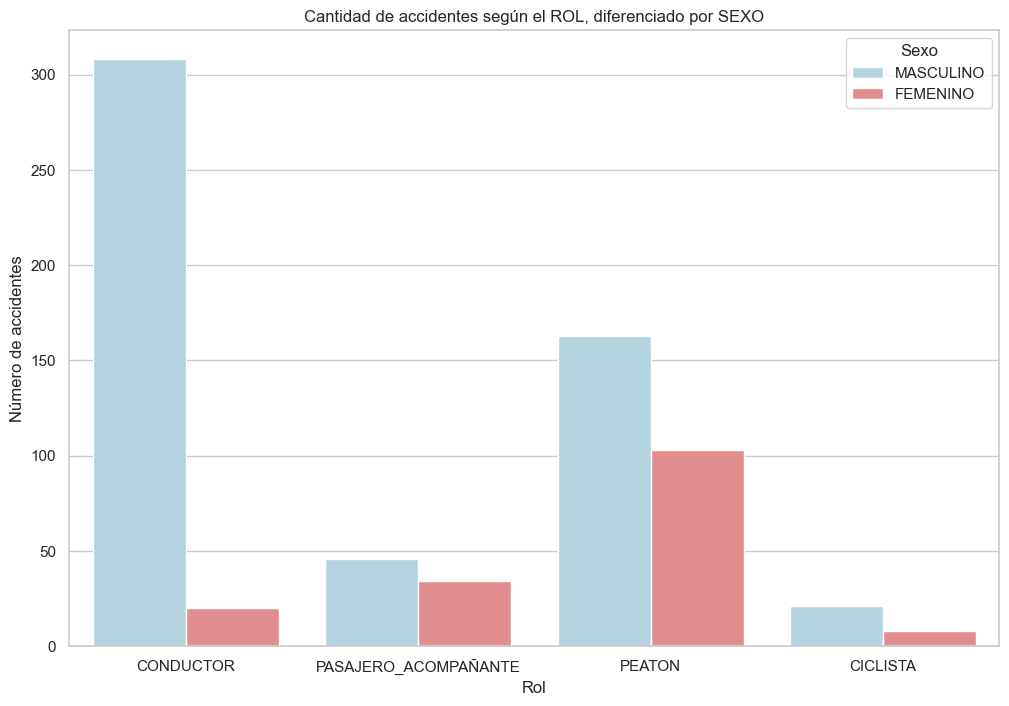

In [105]:
plt.figure(figsize=(12, 8))
sns.countplot(x='ROL', hue='SEXO', data=df[(df['SEXO']!="SD") & (df['ROL']!="SD") ], palette=custom_palette)
plt.title('Cantidad de accidentes según el ROL, diferenciado por SEXO')
plt.xlabel('Rol')
plt.ylabel('Número de accidentes')
plt.legend(title='Sexo', loc='upper right')
plt.show()

Conclusión: en el caso de los hombres, los conductores son los más propensos a estos siniestros, en el caso de las mujeres son peatones

-----------

Gráfico de barras para contar la cantidad de accidentes según la VICTIMA , diferenciado por SEXO

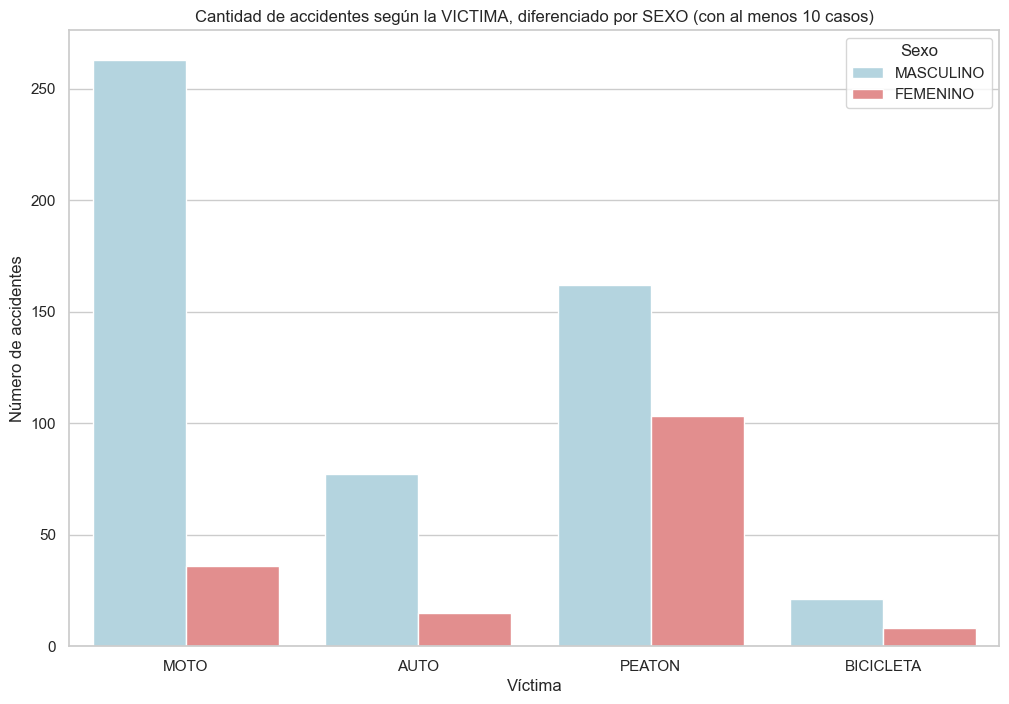

In [106]:
# Filtrar el DataFrame para incluir solo tipos de víctimas con al menos 10 casos
victimas_con_suficientes_casos = df['VICTIMA'].value_counts()[df['VICTIMA'].value_counts() >= 10].index
df_filtrado = df[(df['SEXO'] != "SD") & (df['VICTIMA'] != "SD") & (df['VICTIMA'].isin(victimas_con_suficientes_casos))]

# VICTIMA por SEXO
plt.figure(figsize=(12, 8))
sns.countplot(x='VICTIMA', hue='SEXO', data=df_filtrado, palette=custom_palette)
plt.title('Cantidad de accidentes según la VICTIMA, diferenciado por SEXO (con al menos 10 casos)')
plt.xlabel('Víctima')
plt.ylabel('Número de accidentes')
plt.legend(title='Sexo', loc='upper right')
plt.show()


Conclusión: en el caso de los hombres, las víctimas en su mayoría se desplazaban en moto, en el caso de las mujeres iban caminando.

------------

Gráfico de barras para contar la cantidad de accidentes según el ACUSADO , diferenciado por SEXO

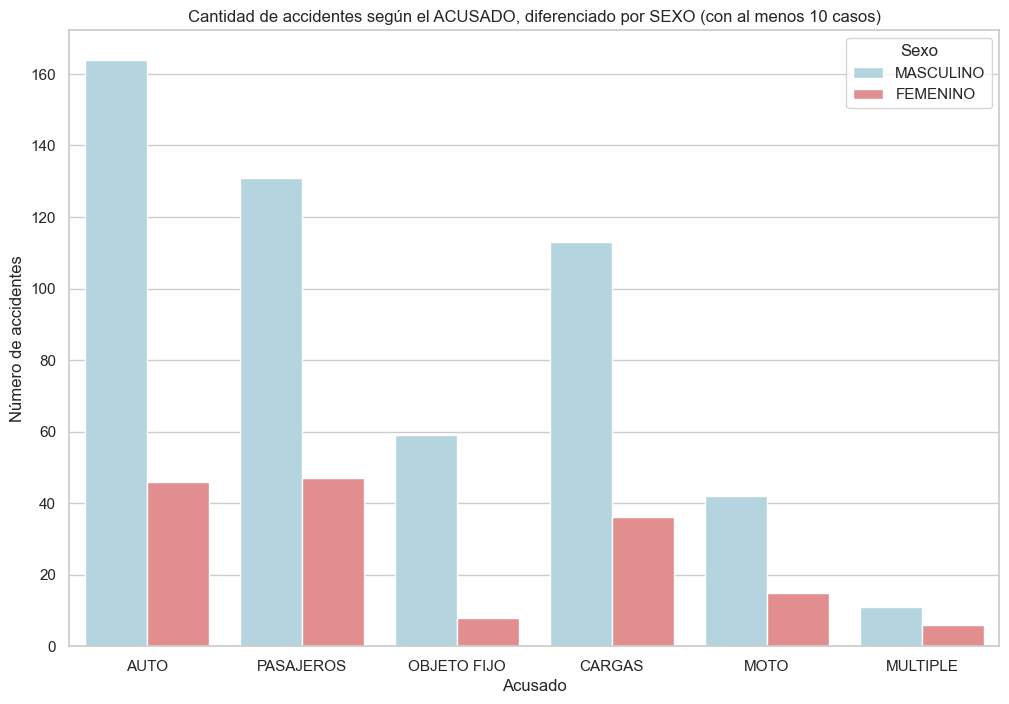

In [107]:

# Filtrar el DataFrame para incluir solo valores de 'ACUSADO' con al menos 10 casos
acusados_con_suficientes_casos = df['ACUSADO'].value_counts()[df['ACUSADO'].value_counts() >= 10].index
df_filtrado = df[(df['SEXO'] != "SD") & (df['ACUSADO'] != "SD") & (df['ACUSADO'].isin(acusados_con_suficientes_casos))]

# ACUSADO por SEXO
plt.figure(figsize=(12, 8))
sns.countplot(x='ACUSADO', hue='SEXO', data=df_filtrado, palette=custom_palette)
plt.title('Cantidad de accidentes según el ACUSADO, diferenciado por SEXO (con al menos 10 casos)')
plt.xlabel('Acusado')
plt.ylabel('Número de accidentes')
plt.legend(title='Sexo', loc='upper right') 
plt.show()

Conclusión: en el caso de los hombres, la mayoría de los casos el acusado es un auto. Si la víctima es una mujer no hay un patrón que señale un acusado en particular, suele ser un auto, un transporte de cargas o en el transporte público.

------------

Gráfico de barras apiladas para combinar rangos etarios con sexos

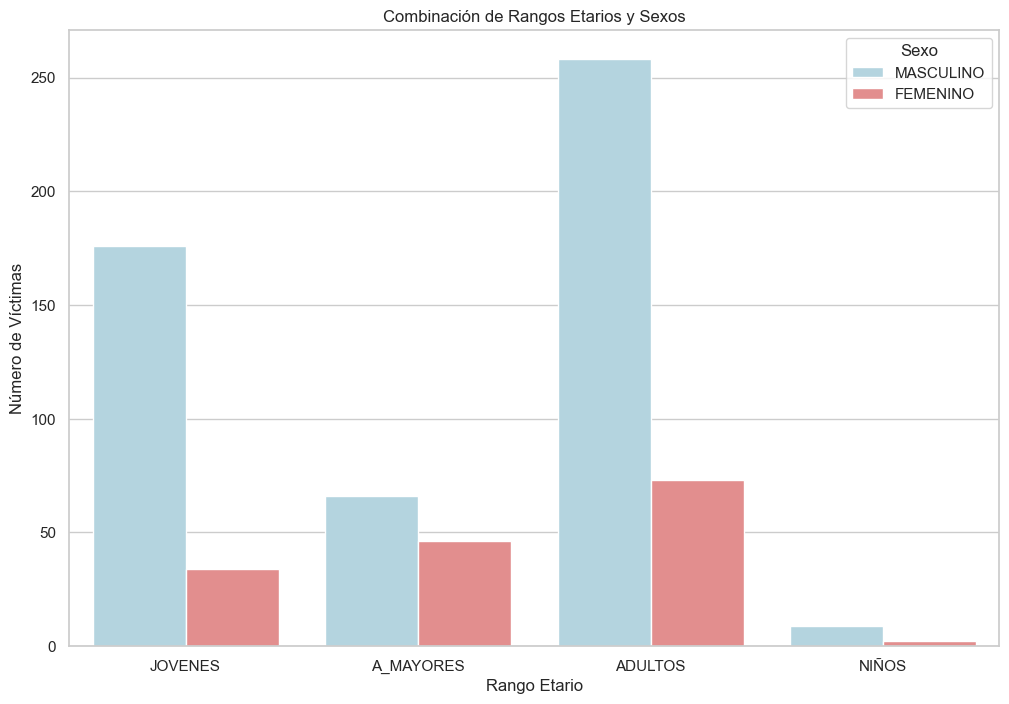

In [108]:
plt.figure(figsize=(12, 8))
sns.countplot(x='RANGO_ETARIO', hue='SEXO', data=df[df['SEXO']!="SD"], palette=custom_palette)
plt.title('Combinación de Rangos Etarios y Sexos')
plt.xlabel('Rango Etario')
plt.ylabel('Número de Víctimas')
plt.legend(title='Sexo', loc='upper right')
plt.show()

Conclusión: se nota una gran diferencia entre las víctimas hombres según su rango etario, cosa que no sucede con tanto énfasis en el caso de las mujeres

---------

Distribución de Edades de las Víctimas en general

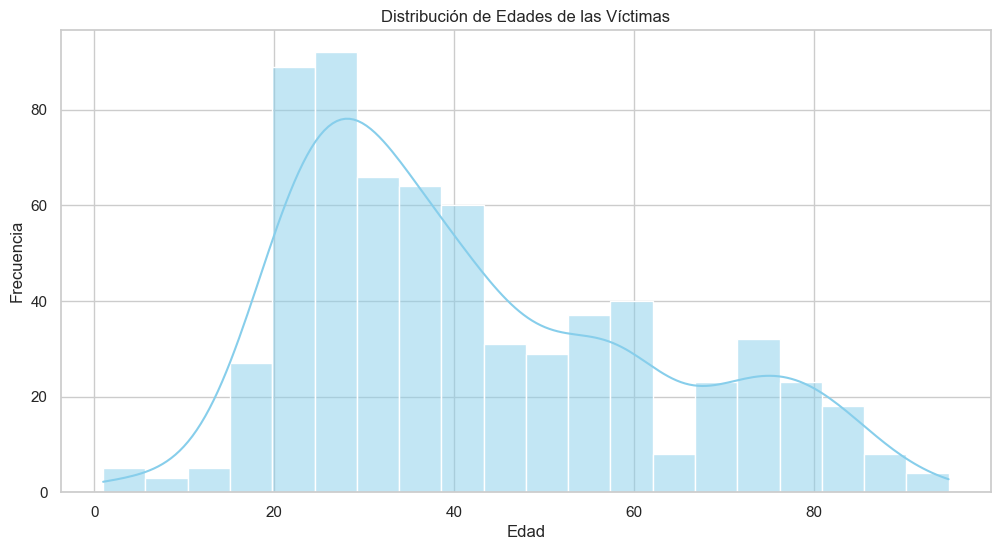

In [109]:
plt.figure(figsize=(12, 6))
sns.histplot(df['EDAD'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Edades de las Víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Distribución de Edades de las Víctimas separadas por sexo

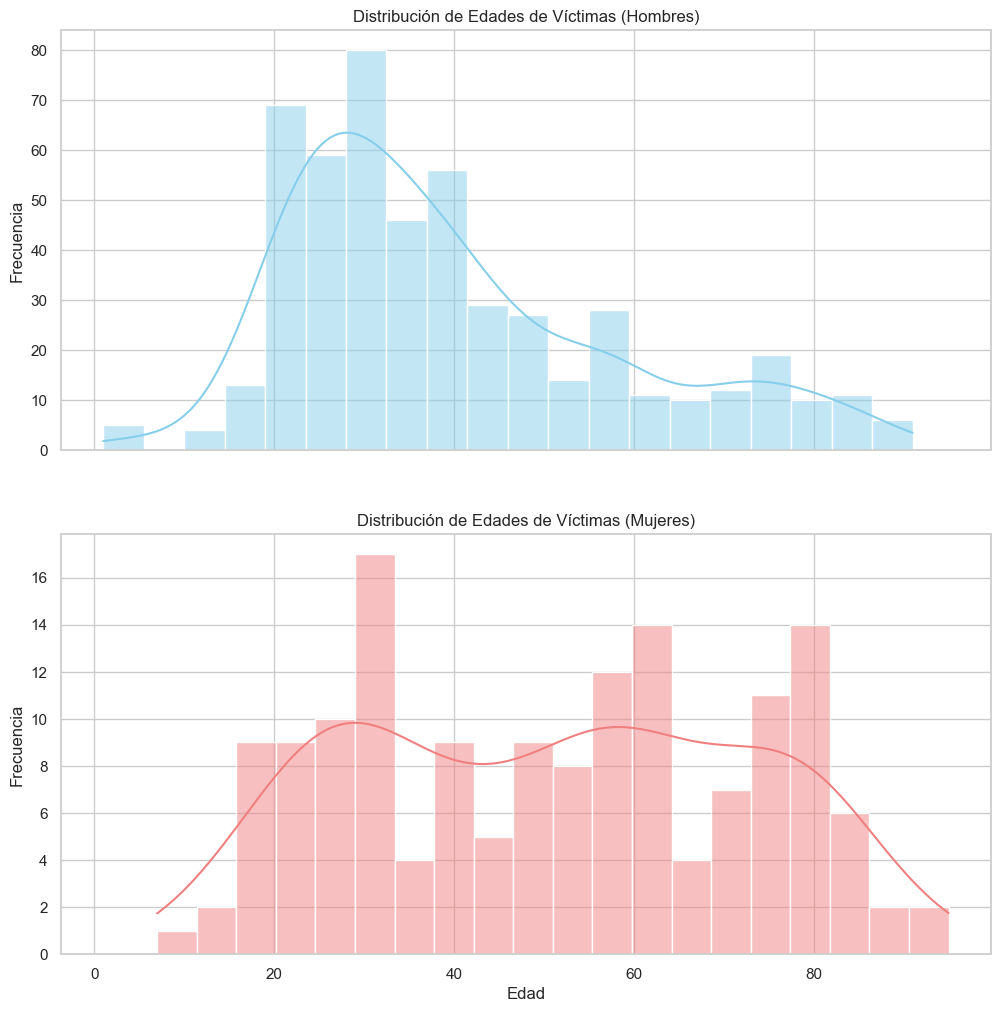

In [110]:
# Filtro los datos para hombres y mujeres
df_hombres = df[df['SEXO'] == 'MASCULINO']
df_mujeres = df[df['SEXO'] == 'FEMENINO']
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12), sharex=True)
# hombres
sns.histplot(df_hombres['EDAD'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribución de Edades de Víctimas (Hombres)')
axes[0].set_ylabel('Frecuencia')
# mujeres
sns.histplot(df_mujeres['EDAD'], bins=20, kde=True, color='lightcoral', ax=axes[1])
axes[1].set_title('Distribución de Edades de Víctimas (Mujeres)')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Frecuencia')

plt.show()


Conclusión: estudiando la distribucion de edades separadas por sexo se puede notar que cuando mas joven es el hombre, mas propenso a siniestros viales, en cambio en las mujeres la edad no parece influir demasiado, es mucho mas uniforme sin mostras patrones claros.

---------------

Boxplot para mostrar la variacion de los años diferenciados por roles y sexos

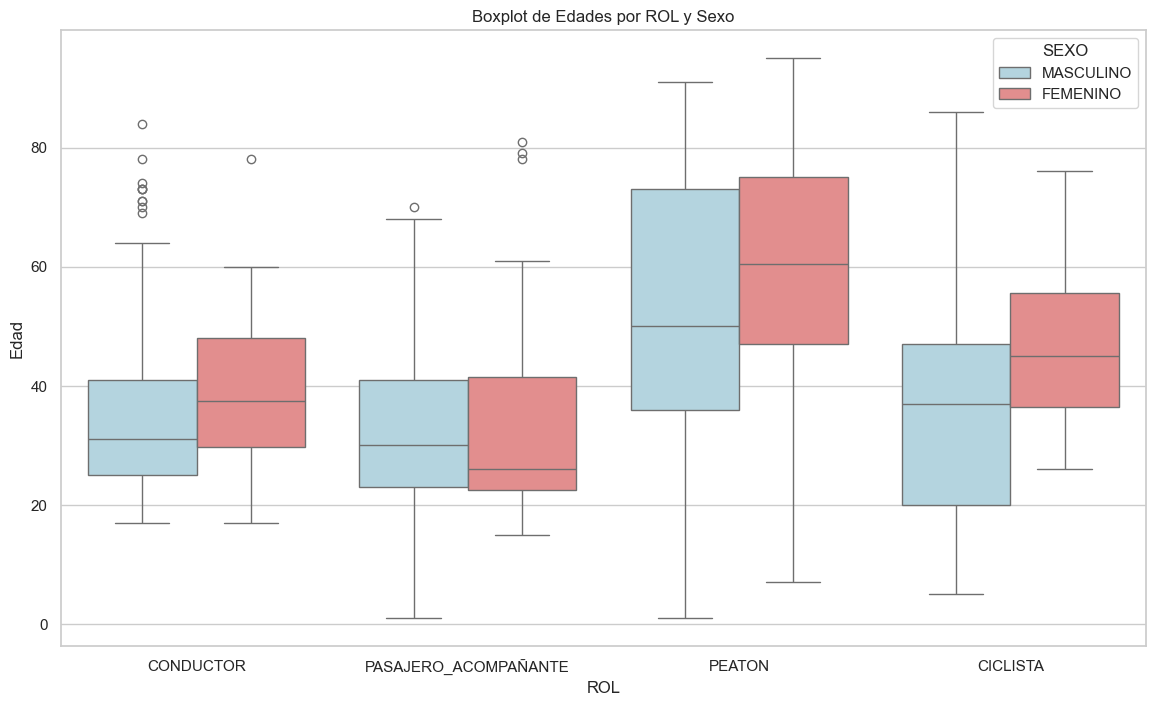

In [111]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='ROL', y='EDAD', hue='SEXO', data=df[(df['SEXO']!="SD") & (df['ROL']!="SD")], palette=custom_palette)
plt.title('Boxplot de Edades por ROL y Sexo')
plt.xlabel('ROL')
plt.ylabel('Edad')
plt.show()

Conclusión: analizando las edades según roles y sexos se puede ver que los peatones son en general personas adultas y adultos mayores, principalmente las mujeres.
Cuando se trata de un conductor por lo general son hombres jóvenes y mujeres adultas.
Cuando son acompañantes se comportan de manera similar y en su mayoría son jóvenes o adultos. Los ciclistas son hombres jóvenes y mujeres adultas principalmente.


# Analisis de geolocalización 

Gráfico de dispersión para visualizar la relación entre la longitud y la latitud segun el tipo de Victima

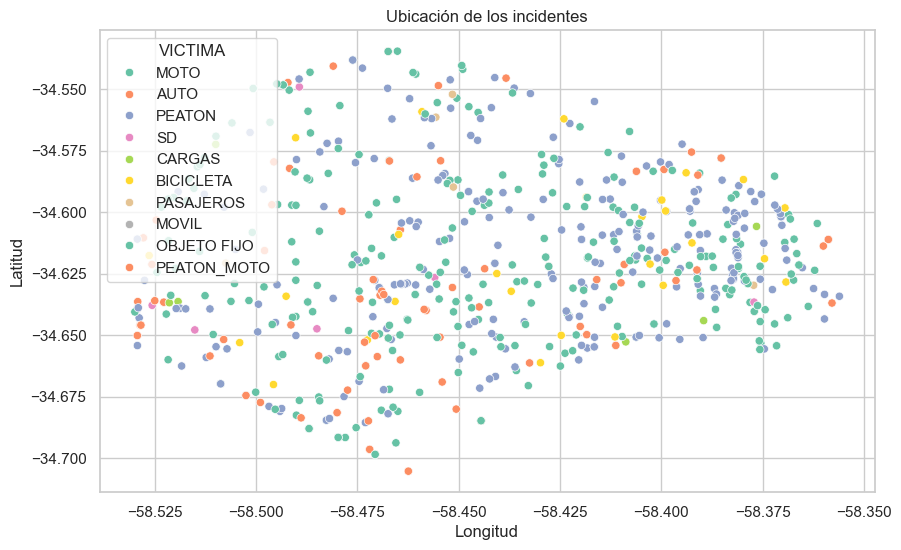

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LONGITUD', y='LATITUD', data=df, hue='VICTIMA', palette='Set2')
plt.title('Ubicación de los incidentes')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

Creo un mapa interactivo con marcadores en la ubicaciones de los siniestros

In [113]:
# Elimio filas con valores NaN en 'LATITUD' o 'LONGITUD'
df_cleaned = df[(~df['LATITUD'].isna()) | (~df['LONGITUD'].isna())]

mapa = folium.Map(location=[df_cleaned['LATITUD'].iloc[100], df_cleaned['LONGITUD'].iloc[100]], zoom_start=12)

# marcadores
marker_cluster = MarkerCluster().add_to(mapa)

for index, row in df_cleaned.iterrows():
        folium.Marker([row['LATITUD'], row['LONGITUD']],
                      popup=f"ID: {row['ID']}, Víctima: {row['VICTIMA']}",
                      icon=folium.Icon(color='red')).add_to(marker_cluster)

mapa

Guardo el mapa como un archivo HTML para mostrarlo localmente o como pagina web (alojado en un servidor)

In [114]:
mapa.save('ubicacion_incidentes.html')

Mapa interactivo: https://siniestros-viales-caba.netlify.app/